In [1]:
# 1. Imports and Setup
import os
import sys

# Ensure the src directory is in the Python path


sys.path.append(os.path.abspath(".."))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.forecasting_models import (
    train_arima_model,
    forecast_arima,
    create_sequences,
    train_lstm_model,
    forecast_lstm,
    evaluate_forecast
)
from sklearn.preprocessing import MinMaxScaler

# Define parameters
ticker_to_predict = "TSLA"
split_date = "2023-01-01"
n_steps_lstm = 60 # Look-back period for LSTM


In [3]:
# --- 2. Data Loading and Splitting ---
print("--- 2. Data Loading and Splitting ---")
# Load the preprocessed data from Task 1
merged_df = pd.read_csv("../data/processed/merged_prices.csv", index_col=0, parse_dates=True)
tsla_prices = merged_df[ticker_to_predict].to_frame()

# Split data chronologically
train_data = tsla_prices[tsla_prices.index < split_date]
test_data = tsla_prices[tsla_prices.index >= split_date]
print(f"Training data size: {len(train_data)} records")
print(f"Testing data size: {len(test_data)} records\n")


--- 2. Data Loading and Splitting ---
Training data size: 756 records
Testing data size: 502 records



In [4]:
# --- 3. ARIMA Model Implementation ---
print("--- 3. ARIMA Model Implementation ---")
arima_model = train_arima_model(train_data[ticker_to_predict])
# --- 2. Data Loading and Splitting ---
print("--- 2. Data Loading and Splitting ---")
# Load the preprocessed data from Task 1
merged_df = pd.read_csv("../data/processed/merged_prices.csv", index_col=0, parse_dates=True)
tsla_prices = merged_df[ticker_to_predict].to_frame()


--- 3. ARIMA Model Implementation ---
Finding optimal ARIMA parameters with auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5466.466, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5459.925, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5460.840, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5460.879, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5458.071, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5462.475, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.819 seconds
--- 2. Data Loading and Splitting ---


In [5]:
# Split data chronologically
train_data = tsla_prices[tsla_prices.index < split_date]
test_data = tsla_prices[tsla_prices.index >= split_date]
print(f"Training data size: {len(train_data)} records")
print(f"Testing data size: {len(test_data)} records\n")
arima_forecast = arima_model.predict(n_periods=len(test_data))
arima_forecast.index = test_data.index
print("\nARIMA Forecast:")
print(arima_forecast.head())

Training data size: 756 records
Testing data size: 502 records


ARIMA Forecast:
Date
2023-01-03    123.18
2023-01-04    123.18
2023-01-05    123.18
2023-01-06    123.18
2023-01-09    123.18
dtype: float64


In [6]:
# --- 4. LSTM Model Implementation ---
print("\n--- 4. LSTM Model Implementation ---")
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_prices)

# Split scaled data for LSTM training
train_scaled = scaled_data[:len(train_data)]
test_scaled = scaled_data[len(train_data):]

# Create sequences for training
X_train, y_train = create_sequences(train_scaled, n_steps=n_steps_lstm)

# Train and forecast with the LSTM model
lstm_model = train_lstm_model(X_train, y_train, n_steps=n_steps_lstm)
lstm_forecast_scaled = lstm_model.predict(
    X_train[-len(test_data):].reshape(len(test_data), n_steps_lstm, 1)
)

# Inverse transform the forecast to the original scale
lstm_forecast = scaler.inverse_transform(lstm_forecast_scaled)
lstm_forecast = pd.Series(lstm_forecast.flatten(), index=test_data.index)
print("\nLSTM Forecast:")
print(lstm_forecast.head())


--- 4. LSTM Model Implementation ---
Training LSTM model...
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1331
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0088
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0019
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0019
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0017
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0015
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014
Epoch 15/5


--- 5. Evaluating and Comparing Models ---

ARIMA Model Performance:
MAE: 101.1148
RMSE: 116.6769
MAPE: 41.9434%

LSTM Model Performance:
MAE: 79.8186
RMSE: 102.6459
MAPE: 35.7957%


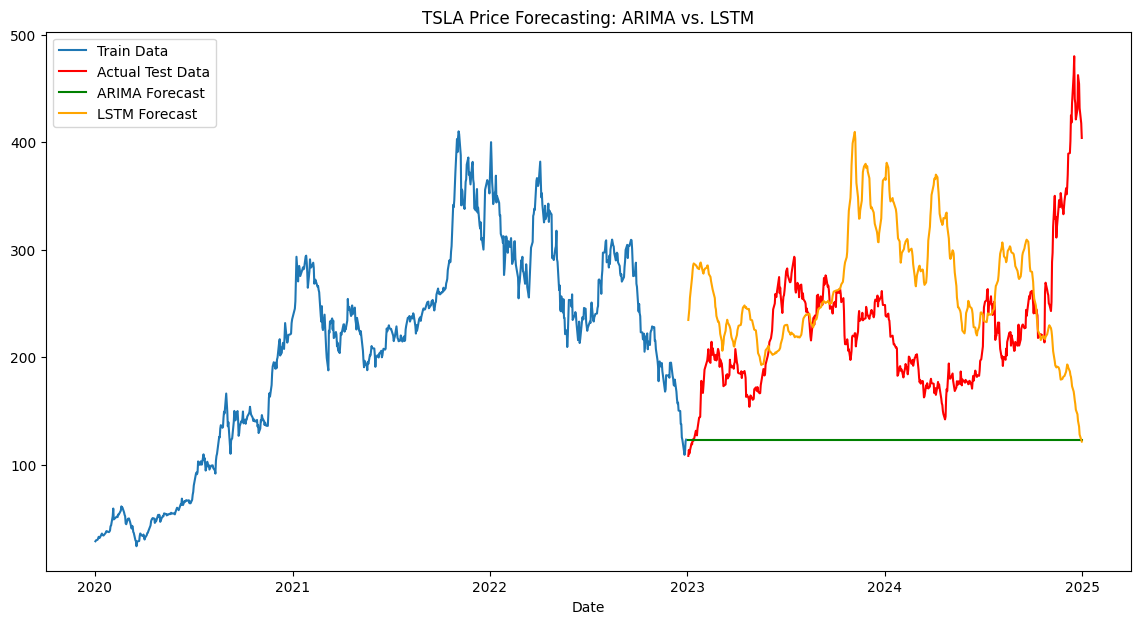


Task 2: Time series forecasting complete.


In [7]:
# --- 5. Evaluation and Comparison ---
print("\n--- 5. Evaluating and Comparing Models ---")
# Evaluate ARIMA
print("\nARIMA Model Performance:")
evaluate_forecast(test_data[ticker_to_predict], arima_forecast)

# Evaluate LSTM
print("\nLSTM Model Performance:")
evaluate_forecast(test_data[ticker_to_predict].iloc[n_steps_lstm:], lstm_forecast.iloc[n_steps_lstm:])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data[ticker_to_predict], label="Train Data")
plt.plot(test_data.index, test_data[ticker_to_predict], label="Actual Test Data", color="red")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast", color="green")
plt.plot(lstm_forecast.index, lstm_forecast, label="LSTM Forecast", color="orange")
plt.title(f"TSLA Price Forecasting: ARIMA vs. LSTM")
plt.xlabel("Date")
plt.legend()
plt.savefig("figures/arima_vs_lstm_forecast.png")
plt.show()

print("\nTask 2: Time series forecasting complete.")